### Unsupervised NLP Topic Modeling using Embeddings

In [1]:
import numpy as np
import numpy.linalg as lg
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random, os, math
import tensorflow as tf
import tensorflow_hub as hub
import tf_keras as keras
from numpy.linalg import norm

2025-10-15 11:16:39.657622: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-10-15 11:16:39.657847: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-10-15 11:16:39.707561: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-10-15 11:16:40.967973: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To tur

In [2]:
embedding_model_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
model_guse = hub.load(embedding_model_url)

2025-10-15 11:16:41.497408: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [3]:
def text_embed_guse_512(input_text, embed_model = model_guse):
    sentense_in = [input_text]
    return embed_model(sentense_in)

In [4]:
text_embed_guse_512('This is my sentense')

2025-10-15 11:16:45.839958: E tensorflow/core/util/util.cc:131] oneDNN supports DT_INT64 only on platforms with AVX-512. Falling back to the default Eigen-based implementation if present.


<tf.Tensor: shape=(1, 512), dtype=float32, numpy=
array([[ 2.26361323e-02, -2.90597100e-02,  3.83906364e-02,
         2.13761348e-02, -6.40866235e-02,  2.61133704e-02,
        -2.02401960e-03,  3.99798118e-02,  4.02332284e-02,
         7.89887384e-02,  5.30997999e-02, -2.52464339e-02,
        -1.59488320e-02,  6.07219599e-02,  3.56148072e-02,
        -7.67424032e-02, -1.13841314e-02,  5.01085967e-02,
        -2.42081452e-02, -4.41218503e-02,  7.28724971e-02,
         7.89408088e-02, -3.55671346e-02,  4.69258726e-02,
        -5.73922247e-02,  5.75977303e-02,  2.44239029e-02,
        -5.62107861e-02, -1.84018407e-02, -5.07303253e-02,
         1.01805842e-02, -2.33975127e-02,  3.99819482e-03,
        -1.25181004e-02, -7.50081763e-02, -4.08967398e-02,
         6.95163533e-02,  3.41316499e-02, -4.50420305e-02,
         2.00611129e-02,  1.00327414e-02, -3.48685235e-02,
         4.57642302e-02, -1.41023158e-03, -5.67270890e-02,
         4.70738411e-02, -5.17912209e-02,  2.44655740e-03,
      

### Load Data to be Clustered

In [5]:
def data_load(file_path_, encoding = 'utf-8'):
    df = pd.read_csv(file_path_, encoding=encoding)
    X = df.Tweet
    return X

In [6]:
def generate_ids(number, size):
  import string, random
  ids=[]
  for i in range(number):
    res = ''.join(random.choices(string.ascii_letters, k=size))
    ids.append(res)
    if len(set(ids)) != i+1:
      i-=1
      ids.pop(-1)

  return ids

In [7]:
def Populate_Index(X, embed_func=text_embed_guse_512):
    dict_of_sentences = dict()
    ids = generate_ids(len(X),7)
    for i in range(len(X)):
        # print(X[i])
        dict_of_sentences[i] = {'unique_id':ids[i],'Vector':embed_func(X[i]).numpy(),'Metadata':{'text':X[i]}}
    return dict_of_sentences

In [8]:
file_path = "/home/dedsec995/Data_Science_Learning/dataset/day29/data_elonmusk2.csv"

X = data_load(file_path,'iso-8859-1')


In [9]:
tweet_index = Populate_Index(X)

In [10]:
tweet_index[23]

{'unique_id': 'DqqVDSf',
 'Vector': array([[-5.41965589e-02, -6.40160963e-02,  4.56827832e-03,
         -2.43067369e-02,  2.43720505e-02, -5.60915545e-02,
         -2.53111552e-02, -1.68746095e-02, -8.01747367e-02,
         -9.05051008e-02, -3.25682499e-02,  1.32230418e-02,
          3.19364555e-02, -8.95939767e-02,  1.97230373e-02,
          1.06919482e-02,  1.16682127e-02, -8.03479168e-04,
          5.62556349e-02, -6.62942380e-02, -1.06742280e-02,
         -3.28763202e-02,  2.81777550e-02,  7.62109309e-02,
         -5.93733275e-03, -3.76911685e-02, -5.65260500e-02,
          2.74753440e-02, -5.13492599e-02,  2.59850249e-02,
          2.14634202e-02, -2.44957674e-03,  6.90597016e-03,
         -6.77868165e-03, -5.02794161e-02, -3.85193191e-02,
         -1.68059617e-02,  7.32876435e-02,  1.75549500e-02,
         -4.46230508e-02,  4.22467329e-02, -1.22216400e-02,
         -4.09687161e-02,  6.12836480e-02,  1.91107132e-02,
          1.29112210e-02,  2.37234216e-02,  4.72378656e-02,
     

### Clustering using K Means on Embeddings

In [11]:
def Train_data_from_Index(my_index_dict):
    return np.vstack([np.hstack(my_index_dict[i]['Vector'])for i in range(len(my_index_dict))])

In [12]:
X_tweets = Train_data_from_Index(tweet_index)

In [13]:
X_tweets[23]

array([-5.41965589e-02, -6.40160963e-02,  4.56827832e-03, -2.43067369e-02,
        2.43720505e-02, -5.60915545e-02, -2.53111552e-02, -1.68746095e-02,
       -8.01747367e-02, -9.05051008e-02, -3.25682499e-02,  1.32230418e-02,
        3.19364555e-02, -8.95939767e-02,  1.97230373e-02,  1.06919482e-02,
        1.16682127e-02, -8.03479168e-04,  5.62556349e-02, -6.62942380e-02,
       -1.06742280e-02, -3.28763202e-02,  2.81777550e-02,  7.62109309e-02,
       -5.93733275e-03, -3.76911685e-02, -5.65260500e-02,  2.74753440e-02,
       -5.13492599e-02,  2.59850249e-02,  2.14634202e-02, -2.44957674e-03,
        6.90597016e-03, -6.77868165e-03, -5.02794161e-02, -3.85193191e-02,
       -1.68059617e-02,  7.32876435e-02,  1.75549500e-02, -4.46230508e-02,
        4.22467329e-02, -1.22216400e-02, -4.09687161e-02,  6.12836480e-02,
        1.91107132e-02,  1.29112210e-02,  2.37234216e-02,  4.72378656e-02,
       -2.57730801e-02, -8.07164609e-03,  7.96367750e-02, -2.25506444e-02,
        9.39096734e-02, -

### (O) K MEANS

In [14]:
def Responsibility(X,means,beta=1e-3,*args,**kwargs):
  diff=[]
  responsibilities=[]

  for mean in means:
    diff =X -mean
    dist =(np.sum(diff ** 2,axis=1,keepdims=True))

    numerator= np.exp(-(beta*dist))
    denominator=np.sum(numerator)
    responsibility=-numerator/denominator

    responsibilities.append(responsibility)
  return np.hstack(responsibilities)

In [15]:
def Distance(X, means,*args,**kwargs):
  diff=[]
  dists=[]
  for mean in means:
    diff=X-mean
    dist=np.sqrt(np.sum(diff**2,axis=1, keepdims=True))
    dists.append(dist)
  return np.hstack(dists)

In [16]:
class K_Means:
  def __init__(self, k=3, distance_func=Distance, beta=None):
    self.k=k
    self.distance_func=distance_func
    self.beta=beta

  def fit(self, X, iterations = 5):
    indices =np.arange(X.shape[0])
    sample_indices = np.random.choice(indices, size=self.k, replace=False)
    self.means =X[sample_indices]

    for i in range(iterations):
      y_hat = self.predict(X)
      self.means=[]
      for j in range(self.k):
        mean =np.mean(X[y_hat==j], axis=0)
        self.means.append(mean)
      self.means =np.vstack(self.means)
      
    y_hat = self.predict(X)
    plt.figure()
    plt.scatter(X[:,0],X[:,1], s=1, c=y_hat)
    plt.scatter(self.means[:,0],self.means[:,1], c='k', s=9)
    plt.show()
    return y_hat

  def predict(self, X):
    dist = self.distance_func(X, self.means, self.beta)
    y_hat = np.argmin(dist, axis=1)
    return y_hat

 

In [17]:
def cluster_embeddings(X, distance_func=Distance, k=6, beta=0, iterations=20):
  kmeans = K_Means(k=k, distance_func=distance_func, beta=beta)
  y_hat=kmeans.fit(X, iterations=20)
  centroid_tweet_indices=[]
  print(y_hat)
  for cluster in range(k):
    centroid=kmeans.means[cluster]
    dists=np.sqrt(np.sum((centroid-X)**2,axis=1, keepdims=True))
    closest_index=np.argmin(dists)
    centroid_tweet_indices.append(closest_index)
  return centroid_tweet_indices,y_hat

In [18]:
def display_tweet_clusters(index_dict,name_index, obs_per_cluster,y_hat):
  k = len(set(y_hat))
  for j in range(k):
    count=0
    print("Representative Obs:"+index_dict[name_index[j]]["Metadata"]['text']+"\n")
    for i in range(len(index_dict)):
      if y_hat[i]==j:
        count+=1

        print("Cluster: "+str(y_hat[i])+" Tweet: "+index_dict[i]["Metadata"]['text'])
      if count>obs_per_cluster:break
    print('\n')
 

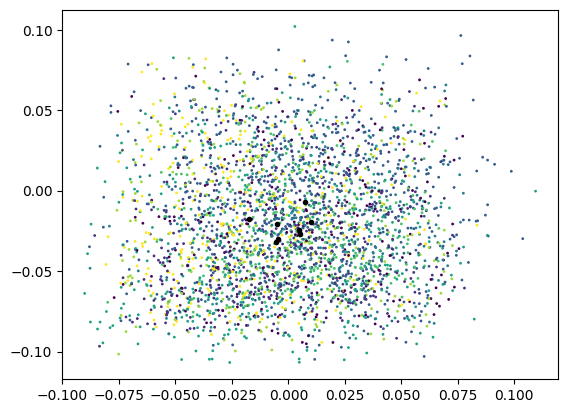

[7 5 2 ... 7 0 1]


In [19]:
name_index, clusters = cluster_embeddings(X_tweets,distance_func=Responsibility,k=8,beta=3)

In [20]:
display_tweet_clusters(tweet_index,name_index,10,clusters)

Representative Obs:RT @NASA: #Mars is hard, but it?s worth the risks to extend humanity?s frontier beyond Earth. Learn about our neighbor planet: https://t.co?

Cluster: 0 Tweet: BFR will take you anywhere on Earth in less than 60 mins https://t.co/HWt9BZ1FI9
Cluster: 0 Tweet: Mars City
Opposite of Earth. Dawn and dusk sky are blue on Mars and day sky is red. https://t.co/XHcZIdgqnb
Cluster: 0 Tweet: Moon Base Alpha https://t.co/voY8qEW9kl
Cluster: 0 Tweet: Headed to Adelaide soon to describe new BFR planetary colonizer design in detail @IAC2017. This should be worth seeing. Design feels right.
Cluster: 0 Tweet: @SethicusGP NK launching a nuclear missile would be suicide for their leadership, as SK, US and China wd invade and? https://t.co/lmbkjRsucC
Cluster: 0 Tweet: China, Russia, soon all countries w strong computer science. Competition for AI superiority at national level most likely cause of WW3 imo.
Cluster: 0 Tweet: @GigarothPack Not a bad idea. For sure, it makes sense to test 